# Linear Regression


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rc('font', size=16)
matplotlib.style.use('ggplot')

Let's look at the `cars` data set

In [2]:
cars = pd.read_csv('data/cars_multivariate.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


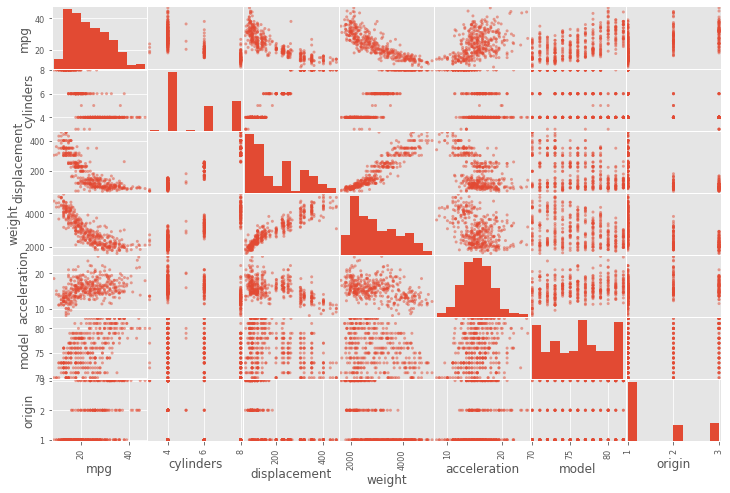

In [5]:
pd.plotting.scatter_matrix(cars, figsize=(12,8));

## Linear Regression

What is it? We are hypothesizing a **linear relationship** between a *target* (or 'endogenous' variable) and some *features* (predictors, or 'exogenous' variables).

In the case of a **single** feature, we are looking to quantify the relationship of the form
$$ y = mx + b $$

Let's select `mpg` as our target and `weight` as our predictor.

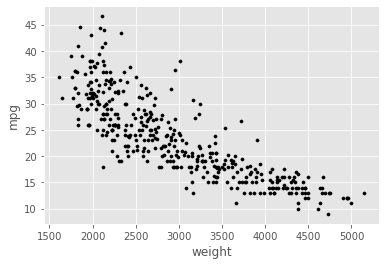

In [41]:
y = cars['mpg']
X = cars['weight']

fig, ax = plt.subplots()
ax.scatter(X,y, color='k', s=10)
ax.set_xlabel('weight')
ax.set_ylabel('mpg');

There are lots of lines we could draw... how do we pick a "best" line?

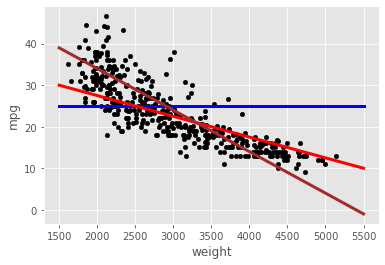

In [7]:
fig, ax = plt.subplots()
xx = np.linspace(1500,5500)
line0 = 0*xx + 25
line1 = (-1/200)*(xx - 1500) + 30
line2 = (-1/100)*(xx - 1500) + 39

ax.scatter(X,y, color='k', s=20)
ax.set_xlabel('weight')
ax.set_ylabel('mpg')
ax.plot(xx, line0, color='b', lw=3)
ax.plot(xx, line1, color='r', lw=3)
ax.plot(xx, line2, color='brown', lw=3);

Let's call our line $\hat{y}$. For any point $x_i$, we have our observed value $y_i$ and our value predicted from our line $$\hat{y}_i = \beta_0 + \beta_1 x_i$$

The *residual* is the distance between our predicted value and the actual value
$$r_i = y_i - \hat{y}_i$$

Let's find the line that minimizes the total **sum of squared residuals** (SSR)
$$ SSR = \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

SSR for this line: 13084.72088


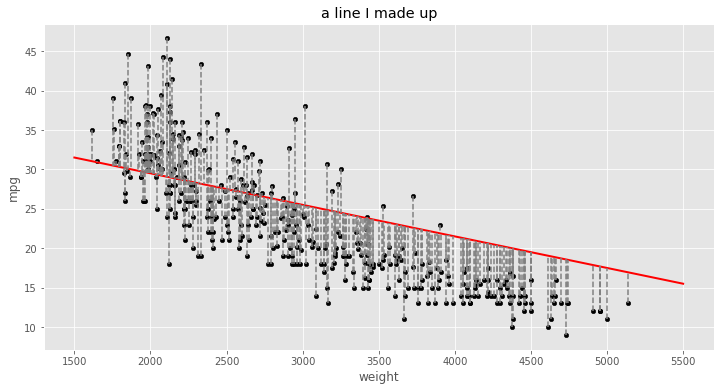

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X,y, color='k', s=20)
ax.set_xlabel('weight')
ax.set_ylabel('mpg')

b0 = (1500/200) + 30
b1 = (-1/250)

line1 = b0 + b1*xx
ax.plot(xx, line1, color='r', lw=2)

for x_i, y_i in zip(X,y):
    ax.plot([x_i, x_i], [y_i, b1*x_i+b0],
            color='gray',
            linestyle='dashed')
    
ax.set_title("a line I made up")    

resids = y - (b0 + b1 * X)
print("SSR for this line: {}".format((resids**2).sum()))

#### Fun exercise: show that the line that minimizes the SSR in the single feature case is

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

$$\beta_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

## Using statsmodels

In [9]:
X.head()

0    3504.0
1    3693.0
2    3436.0
3    3433.0
4    3449.0
Name: weight, dtype: float64

The `statsmodels` package finds the best-fit line through the origin, i.e., with an intercept of zero. If we want it to find the best intercept (and we almost always do), we need to add an extra constant column.

**Question:** why does adding the column help?

In [10]:
y = cars['mpg']
X = sm.add_constant(cars['weight'])

In [11]:
X

,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0
...,...,...
393,1.0,2790.0
394,1.0,2130.0
395,1.0,2295.0
396,1.0,2625.0


In [12]:
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0


In [13]:
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [14]:
simple_model = sm.OLS(y, X)
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          2.97e-103
Time:                        11:12:12   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With `statsmodels` (unlike `sklearn`) fitting a model returns a different kind of object, called a results object or a fitted model.

In [15]:
type(simple_model)

statsmodels.regression.linear_model.OLS

In [16]:
type(simple_results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [17]:
simple_results.params

const     46.317364
weight    -0.007677
dtype: float64

In [18]:
X.head()

,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0


The results object can be used for prediction.

In [19]:
simple_results.predict([1,3400])

array([20.2168902])

In [20]:
simple_results.predict(sm.add_constant(cars['weight'])).head()

0    19.418523
1    17.967643
2    19.940532
3    19.963562
4    19.840736
dtype: float64

Those are just the same values as we fit the model with.

In [21]:
simple_results.fittedvalues.head()

0    19.418523
1    17.967643
2    19.940532
3    19.963562
4    19.840736
dtype: float64

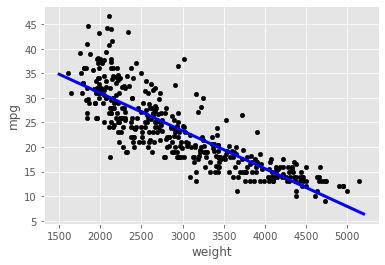

In [22]:
xx = np.linspace(1500,5200)
best_line = simple_results.params['const'] + simple_results.params['weight']*xx

fig, ax = plt.subplots()
ax.scatter(X['weight'],y, color='k', s=20)
ax.set_xlabel('weight')
ax.set_ylabel('mpg')
ax.plot(xx, best_line, color='b', lw=3);

## What about multiple features?

Assume we have $p$ features.

Then the linear relationship we are assuming has the form
$$ y = \beta_0*1 + \beta_1* X_1 + \beta_2*X_2 + ... + \beta_p *X_p $$

which we can write as the matrix product
$$Y = X\beta$$
where $Y$ is an $n \times 1$ column vector, $X$ is an $n \times (p+1)$ feature matrix (we've added a column of ones to encode the intercept term), and $\beta$ is a $(p+1) \times 1$ column vector

#### Even more fun exercise
Show that the vector of parameter values $\hat{\beta}$ that minimizes the SSR in the general case is the solution to the matrix equation

 $$ X^T X \hat{\beta} = X^T y $$
 
 Which can also be written as $\hat{\beta} = (X^TX)^{-1}X^Ty$
 
 



## What is regression in more than one dimension?

Let's plot `mpg` against `weight` and `acceleration`

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

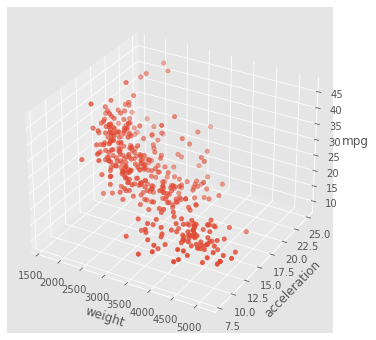

In [24]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg'])
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

Linear regression then finds the **plane** that minimizes SSR.

In [25]:
y = cars['mpg']
X = sm.add_constant(cars[['weight','acceleration']])
X.head()

,const,weight,acceleration
0,1.0,3504.0,12.0
1,1.0,3693.0,11.5
2,1.0,3436.0,11.0
3,1.0,3433.0,12.0
4,1.0,3449.0,10.5


In [26]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          1.69e-103
Time:                        11:12:18   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
results.params

const           41.399828
weight          -0.007336
acceleration     0.250816
dtype: float64

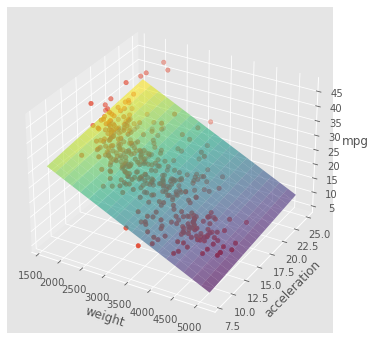

In [28]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg']);
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

xx1 = np.linspace(cars['weight'].min(), cars['weight'].max(), 20)
xx2 = np.linspace(cars['acceleration'].min(), cars['acceleration'].max(), 20)
xx1, xx2 = np.meshgrid(xx1, xx2)
best_plane = (results.params['const'] +
              results.params['weight']*xx1 +
              results.params['acceleration']*xx2)

# Plot the surface.
surf = ax.plot_surface(xx1, xx2, best_plane, color='k', alpha=.6, cmap='viridis')


## What was all that other stuff in the summary?

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          1.69e-103
Time:                        11:12:20   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $R^2$ : The "proportion of variance explained"

Let's for a moment refer to the variance of $y$ as "the total sum of squares"
$$ SST = \sum_i^N (y_i - \bar{y})^2 $$

Then we define $R^2$ as the percentage of that variance that has been "captured" by the regression line
$$
\begin{align}
    R^2 &:= 1 - \frac{SSR}{SST} \\
    &= 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    
$$

## p-values? Confidence intervals?

It turns out we don't just want to solve an optimization problem.

We want to make **statistical claims** about this linear relationship. In order to do that, we need to assume a distribution, so here we go.

$$ y = \beta X + \epsilon $$
where
$$ \epsilon \sim Normal(0, \sigma^2) $$

Equivalently, we can write
$$ y \sim Normal(\beta X, \sigma^2) $$

With some work, you can show the following:
 - Given a set of $N$ observations $\{(x_i, y_i)\}$, where $x_i$ is a $p$-dimensional vector, the maximum likelihood estimate for $\beta$ is the same as the least-squares estimate: $$\hat{\beta} = (X^TX)^{-1}X^Ty$$
 so our model is $\hat{y} = \hat{\beta}X$
 - The sampling distribution of $\beta$ is: $$ \hat{\beta} \sim Normal(\beta, (X^T X)^{-1}\sigma^2)$$
 - The unbiased estimate of $\sigma^2$ is $$\hat{\sigma}^2 = \frac{SSR}{N-p} = \frac{\sum_i^N(y_i - \hat{y}_i)^2}{N-p}$$
   - using this estimate, we can construct confidence bounds on our parameters using the student's t distribution: $$ \hat{\beta}_j \, \pm t_{N-p} \sqrt{(X^T X)^{-1}_{jj}\frac{SSR}{N-p}}$$

Now all our null hypotheses have the form "Does $\beta_i = 0$ ?"

###### References:
- [ISLR 3.1.2](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf)
- [here](http://home.cc.umanitoba.ca/~godwinrt/4042/material/part3.pdf)
- [here](http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf)

## What assumptions must hold in order to make these statistical statements?
Test your assumptions by **plotting your residuals**: $y_{actual} - y_{predicted}$

It is useful to plot your residuals against various features as well as plotting residuals vs predicted y-values.

### Linearity: violated when you see nonlinear trends in your data /  residuals

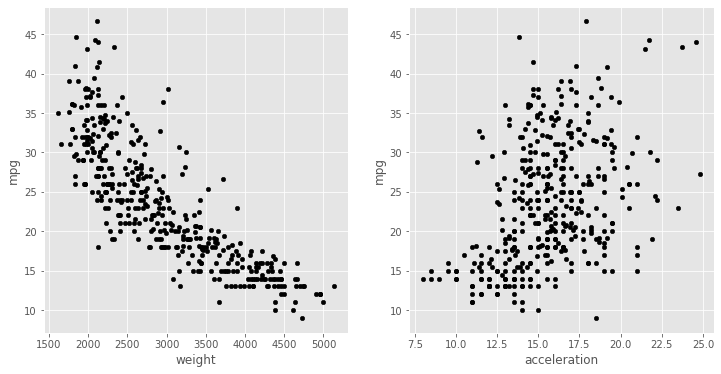

In [30]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].scatter(X['weight'],y, color='k', s=20)
axs[0].set_xlabel('weight')
axs[0].set_ylabel('mpg')

axs[1].scatter(X['acceleration'],y, color='k', s=20)
axs[1].set_xlabel('acceleration')
axs[1].set_ylabel('mpg');

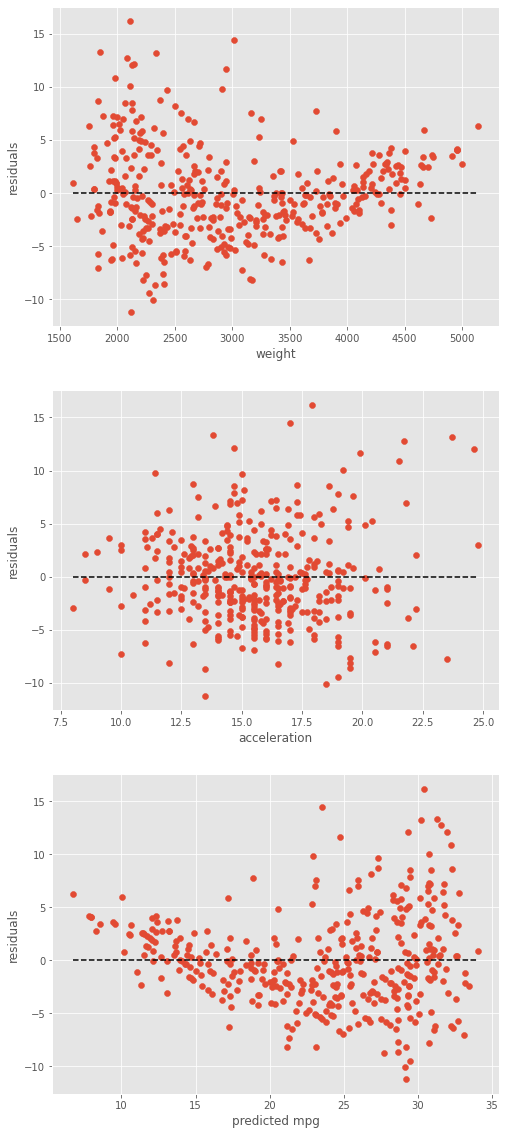

In [31]:
fig, axs = plt.subplots(3,1, figsize=(8,20))

axs[0].scatter(X['weight'], results.resid)
axs[0].hlines(0,
              X['weight'].min(), 
              X['weight'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('weight')
axs[0].set_ylabel('residuals');

axs[1].scatter(X['acceleration'], results.resid)
axs[1].hlines(0,
              X['acceleration'].min(), 
              X['acceleration'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('acceleration')
axs[1].set_ylabel('residuals');

axs[2].scatter(results.fittedvalues, results.resid)
axs[2].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[2].set_xlabel('predicted mpg')
axs[2].set_ylabel('residuals');

Most of the time we want to work with the studentized residuals: divide the residual by the estimate of the standard deviation of the residuals (which turns out to depend on $X$, even though $\epsilon$ above does not depend on $X$. More details [here](https://en.wikipedia.org/wiki/Studentized_residual))

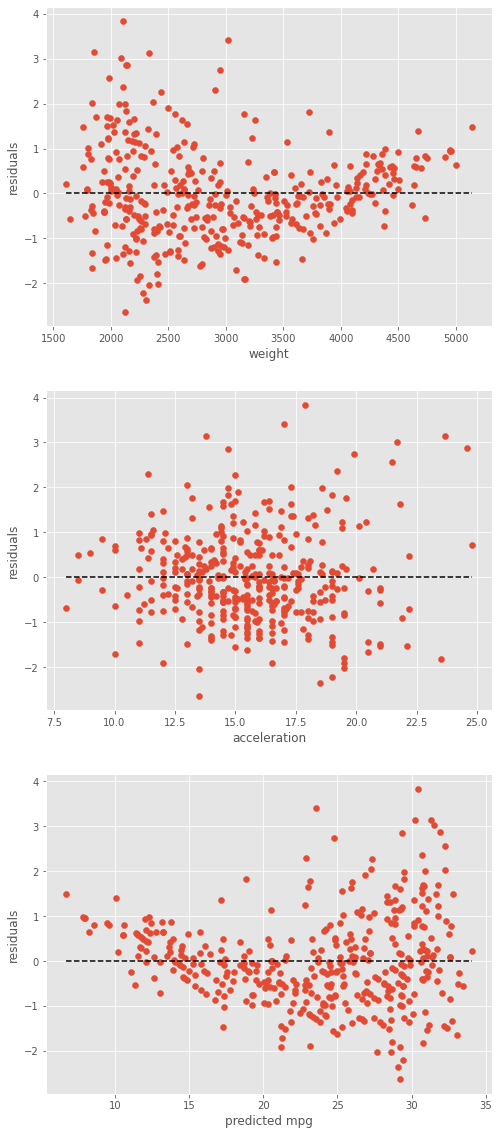

In [32]:
stud_resids = results.outlier_test()['student_resid']

fig, axs = plt.subplots(3,1, figsize=(8,20))

axs[0].scatter(X['weight'], stud_resids)
axs[0].hlines(0,
              X['weight'].min(), 
              X['weight'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('weight')
axs[0].set_ylabel('residuals');

axs[1].scatter(X['acceleration'], stud_resids)
axs[1].hlines(0,
              X['acceleration'].min(), 
              X['acceleration'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('acceleration')
axs[1].set_ylabel('residuals');

axs[2].scatter(results.fittedvalues, stud_resids)
axs[2].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[2].set_xlabel('predicted mpg')
axs[2].set_ylabel('residuals');

### Homoscedasticity: violated when the variance of your residuals isn't constant

There are two approaches here. First, looking at the residuals about, we need the variance to be fairly constant.

Second, there's a hypothesis test for this, the Goldfeld-Quandt test. It divides your data into two subsets and returns the p-value under the null hypothesis of homoscedasticity.

How you split the data in half is arbitrary. Usually, you pick a feature and sort the data by that feature, then split on the median value of that feature. 

In [33]:
X.head()

,const,weight,acceleration
0,1.0,3504.0,12.0
1,1.0,3693.0,11.5
2,1.0,3436.0,11.0
3,1.0,3433.0,12.0
4,1.0,3449.0,10.5


- in `statsmodels.stats.diagnostic.het_goldfeldquandt`, specify the column to use for sorting & splitting data with the parameter `idx`.
  - if you leave it blank, the data will be split just by the order it appears in your data set, which is WAY TOO ARBITRARY
- the default alternative hypothesis is "increasing", meaning it does a one-sided test. pick `alternative='two-sided'` to do a two-tailed test, unless you have a very good reason for assuming the direction of variation change.

In [34]:
f_statistic, p_value, _ = sm.stats.diagnostic.het_goldfeldquandt(y, X, idx=1, alternative='two-sided')
print(p_value)

1.835257415566887e-11


Pretty small p-val. Reject the null. Houston, we have heteroscedasticity.

### Normality: violated when the residuals are not normally distributed

The tools for this are the [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) and the [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) (the null hypothesis for the JB test is "the residuals come from a distribution with zero skewness and zero excess kurtosis", which are both properties of the normal distribution).

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          1.69e-103
Time:                        11:12:31   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The QQ plot puts the *empirical sample quantiles* of the residuals on the y-axis and the *theoretical normal distribution quantiles* on the x-axis. 

For example, say one of the studentized residuals has the value $-1.54$. And perhaps we found that $3.51\%$ of the studentized residuals had a value of $-1.54$ or lower. However, if they had been drawn from a normal distribution, we would expect $3.51\%$ of the residuals to fall at or below the value $-1.81$ instead, so this would show up on the QQ plot as the point $(-1.81,-1.54)$.

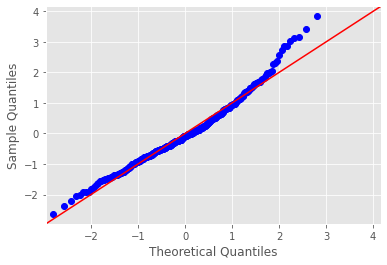

In [36]:
ax = sm.graphics.qqplot(stud_resids, line='45')

### Multicollinearity: strictly violated when one feature is a linear combination of others, loosely violated when one feature is highly correlated with others

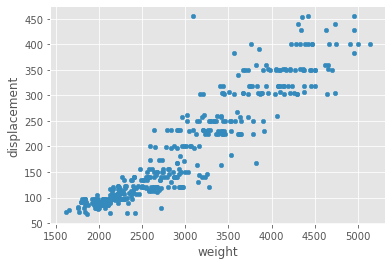

In [37]:
cars.plot.scatter('weight','displacement');

In [38]:
y = cars['mpg']
X = sm.add_constant(cars[['weight','acceleration']])
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          1.69e-103
Time:                        11:12:34   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
y = cars['mpg']
X = sm.add_constant(cars[['weight','acceleration', 'displacement']])
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     307.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          1.01e-102
Time:                        11:12:35   Log-Likelihood:                -1142.7
No. Observations:                 398   AIC:                             2293.
Df Residuals:                     394   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.2991      1.861     22.186      0.000      37.639      44.959
weight          -0.0062      0.001     -8.368      0.000      -0.008      -0.005
acceleration     0.1739      0.098      1.783      0.075      -0.018       0.366
displacement    -0.0109      0.007     -1.675      0.095      -0.024       0.002
==============================================================================
Omnibus:                       36.015   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.328
Skew:                           0.681   Prob(JB):                     5.28e-11
Kurtosis:                       4.000   Cond. No.                     2.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One measure of multicollinearity: the Variance Inflation Factor. Regress feature $X_k$ on all the rest of the features and get the $R^2$ value for that fit.

$$VIF_k = \frac{1}{1 - R_k^2}$$

Rule of thumb: collinearity is high if VIF > 10

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
variance_inflation_factor(X.values, 1)

8.444839059378735

Close call.